# Datasets to HUB

## Raw and Unique

In [1]:
import os
import json
import pandas as pd
from datasets import Dataset, DatasetDict

In [2]:
batch_dir="instruction_io/data_io/starcoder_generations/" # Replace this with your own data path
machine_instructions = []
if os.path.exists(os.path.join(batch_dir, "machine_generated_instructions.jsonl")):
    with open(os.path.join(batch_dir, "machine_generated_instructions.jsonl"), "r") as fin:
        for line in fin:
            instruction_info = json.loads(line)
            machine_instructions.append(instruction_info)
    print(f"Loaded {len(machine_instructions)} machine-generated instructions")

Loaded 5003 machine-generated instructions


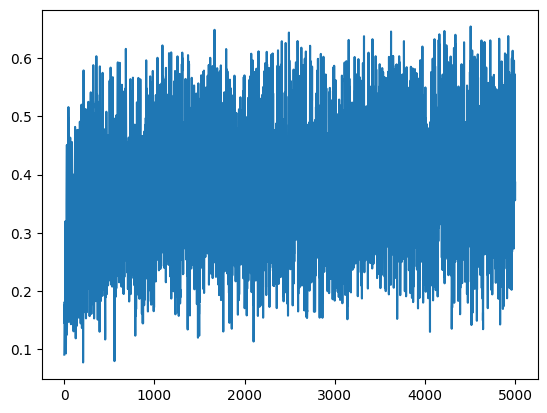

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(
    np.arange(len(machine_instructions)), 
    [np.mean(list(e["most_similar"].values())) for e in machine_instructions]
)

In [4]:
raw = Dataset.from_dict(
        {
            "instruction" : [e["instruction"] for e in machine_instructions],
            "output" : [e["output"] for e in machine_instructions],
            "most_similar": [json.dumps(e["most_similar"]) for e in machine_instructions],
            "avg_similarity_score" : [e["avg_similarity_score"] for e in machine_instructions]
        }
    )

In [8]:
raw

Dataset({
    features: ['instruction', 'output', 'most_similar', 'avg_similarity_score'],
    num_rows: 5003
})

In [5]:
regen_instructions = []
if os.path.exists(os.path.join(batch_dir, "machine_generated_instructions_processed.jsonl")):
    with open(os.path.join(batch_dir, "machine_generated_instructions_processed.jsonl"), "r") as fin:
        for line in fin:
            instruction_info = json.loads(line)
            regen_instructions.append(instruction_info)
    print(f"Loaded {len(regen_instructions)} unique instructions")

Loaded 308 unique instructions


In [6]:
regen = Dataset.from_dict(
            {
                "instruction" : [e["instruction"] for e in regen_instructions],
                "output" : [e["output"] for e in regen_instructions],
                "most_similar": [json.dumps(e["most_similar"]) for e in regen_instructions],
                "avg_similarity_score" : [e["avg_similarity_score"] for e in regen_instructions]
            }
        )

In [7]:
regen

Dataset({
    features: ['instruction', 'output', 'most_similar', 'avg_similarity_score'],
    num_rows: 308
})

## Curated

### Visualization

In [12]:
df = pd.read_csv("starcoder/statistics.csv")

<Axes: title={'center': 'Amount of generated instructions for which score(instruction, ground truth) $\\geq \\frac{x}{10}$'}>

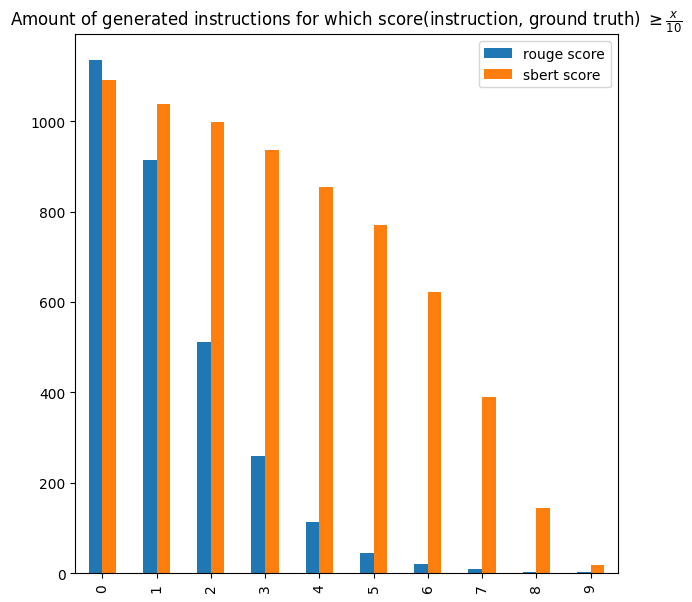

In [13]:
df.plot.bar(figsize=(7, 7), title="Amount of generated instructions for which score(instruction, ground truth) $\geq \\frac{x}{10}$")

### Processing

In [14]:
threshold = 0.5

In [15]:
curated_instructions = []
if os.path.exists(os.path.join(batch_dir, "regen.jsonl")):
    with open(os.path.join(batch_dir, "regen.jsonl"), "r") as fin:
        for i, line in enumerate(fin):
            instruction_info = json.loads(line)
            for k in instruction_info :
                generations = instruction_info[k]
            if len(generations) == 0 :
                continue
            max_sbert_score = max([c for (a, b, c) in generations])
            if max_sbert_score >= threshold :
                curated_instructions.append(machine_instructions[i])
    print(f"Loaded {len(curated_instructions)} machine-generated instructions")

Loaded 771 machine-generated instructions


In [16]:
curated = Dataset.from_dict(
        {
            "instruction" : [e["instruction"] for e in curated_instructions],
            "output" : [e["output"] for e in curated_instructions],
            "most_similar": [json.dumps(e["most_similar"]) for e in curated_instructions],
            "avg_similarity_score" : [e["avg_similarity_score"] for e in curated_instructions]
        }
    )

# SAVING

In [26]:
raw.push_to_hub("ArmelR/self-instruct-starcoder", split="raw")
regen.push_to_hub("ArmelR/self-instruct-starcoder", split="unique")
curated.push_to_hub("ArmelR/self-instruct-starcoder", split="curated")

Pushing dataset shards to the dataset hub: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
Updating downloaded metadata with the new split.
Pushing dataset shards to the dataset hub: 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]
Updating downloaded metadata with the new split.
